# Neural Nets for Multiclass Classification
In this exercise you must implement a multi-class classifier based on neural nets.

You must implement a one hidden layer neural net with relu activation function for the hidden layer and $K$ outputs that are not transformed (i.e.) the output neurons compute the identity function.

As the error function, the $K$ outputs of the neural net are transformed by softmax and the loss is mean negative log likelihood (special case of cross entropy loss, which is also considered in Hand In 1) and is explained in the next cell.

For combatting overfitting you must implement weight decay and early stopping.

With weight decay the cost of one data point becomes becomes

$$
-\sum_{i=1}^k y_i \ln \textrm{softmax}(\textrm{nn}(x))_i + \lambda \left(\sum_{i,j} W_1[i,j]^2 + \sum_{i, j} W_2[i, j]^2\right)
$$

where $y$ is the one-in-k encoding of the data point label (one entry with a one, the rest are zero), nn(x) is the output of the neural net on data point $x$, $\textrm{softmax}(\textrm{nn}(x))_i$ is the $i$'th entry in the vector of *probabilities* computed by softmax, and $W_1$, and $W_2$ are the weight matrices for the neural net. Note that biases are not part of the weight decay term.

For early stopping you must evaluate the mean nll loss and accuracy on a validation set after each epoch. For this computation, you must set the weight decay parameter to zero. 


## Your task is
- Derive a very useful derivative described in the next cell
- Complete the neural net class in net_classifier.py.
- Test your implementation using net_test.py

The prerequisites for the report is listed last.

**Solve the derivative exercise in the next cell (derivation must be included in report) before you start the implementation shortly described in the following cell.**


## Backpropagation Help
As discussed in lectures, a nice way to understand backpropagation is given  [here](http://cs231n.github.io/optimization-2/).
Everything can be coded in a vectorized way using matrices and vectors and their products. But this is **not** required.
For example it is fine to implement the derivative computation assuming just one input point and then repeating that computation for each input data point in the mini-batch.

The test in net_classifier.py tests the gradient of your cost using a numerical estimate of the gradient of the cost for every parameter.

**Start Early, Use The Study Cafe, Check Your Shapes/Dimensions, know there may be numerial issues**

## Derivatives of Negative Log Likelihood as a function of the input to Softmax (the output of the neural net)
In this exercise you must compute the derivative of the softmax operation and the negative log likelihood error in one step as this is much simpler than computing them step by step and  combining them with the chain rule. 

Let $z$ be the $k$-dimensional input to softmax and let $y$ denote the one-hot encoded vector of labels for a given data point (we assume $y$ has a single $1$ and the rest of the entries are $0$).
As a function of $z$, the Negative Log Likelihood loss for $z$ when the true label is $j \in \{1,\dots,k\}$ is
$$
L(z) =  - \sum_{i=1}^k y_i \ln (\textrm{softmax}(z)_i) = - \ln (\textrm{softmax}(z)_j) 
$$

As a function of $z$, the cost $L$ is a function that maps $K$ numbers to one. We are looking for the partial derivative of $L$ relative to every entry in $z$ (the matrix of derivatives)

The derivatie $d_{\textrm{cost}, z}$ is a $1 \times K$ vector where
$$
d_{\textrm{cost}, z}[i] = \frac{\partial L}{\partial z_i}
$$

**Given a one-hot-label label vector $y$ with $y_j=1$, show that:**

$$
\frac{\partial L}{\partial z_i} = - \delta_{i, j} + \frac{1}{\sum_{a=1}^k e^{z_a}} \cdot e^{z_i} =  - \delta_{i, j} + \textrm{softmax}(z)_i
$$
where $\delta_{i,j} =1$ if $i=j$ and zero otherwise.




## Neural Net Implementation
You need to complete the following methods
- predict - return class predictions for all data points given 
- score - return mean accuracy of model on given data  
- cost_grad - compute average cross entropy cost and gradient of this cost for all parameters
- fit - given data run mini batch stochastic gradient descent to learn a good set of parameters that fit the data well, uses a validation set to test current model after each epoch and stores the best weights found.

We have included a cost/gradient checker you can run by running net_classifier.py
This test is not exhaustive so make your own if need be.

When you have completed the exercise **run net_test.py** to test your algorithm on the MNIST digits. You should be able to get above 96 percentage accuracy both in sample and on the test set (results will fluctuate due to randomness in initialization and mini-batches).
The code exports plots for your report.



## The MNIST Data Set
The MNIST digits data set consists of handwritten digits (0 to 9) and the classification task is to recognize the digit. The following piece of code visualizes the first 10 examples in the MNIST data set.


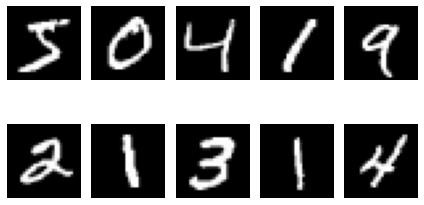

In [1]:
from matplotlib import pyplot as plt
import numpy as np
from sklearn.datasets import fetch_openml

Xm, ym = fetch_openml('mnist_784', version=1, return_X_y=True)
fig = plt.figure()
axes=[]
for i in range(0,10):
    image = Xm[i,:]
    image = np.array(image, dtype='float')
    axes.append(fig.add_subplot(2,5,i+1))
    axes[-1].set_axis_off()
    pixels = image.reshape((28, 28))
    plt.imshow(pixels, cmap='gray')
fig.tight_layout()
plt.show()


## Report
Make a report with two sections

- Add a section called "Part I: Derivative" that includes your derivation of the derivative of the loss function
- Add a section called "Part II: Implementation and test" that includes the code snippet for your forward pass and for your backward pass - Explain if anything did not work.  Include the train and validation data plots of loss and accuracy generated by net_test.py and comment on anything that looks unusual.   

## Uploading to Black Board
Upload the file net_classifier.py 

Upload one pdf with the report to blackboard together with net_classifier.py file

**Ensure you upload the pdf separately!**

**Remember to put your names and student ids inside the pdf report!**

**The PDF should be at most 5 pages!**


